In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 64kB/s 
     |████████████████████████████████| 204kB 35.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=328abc01c2df6094bffa3969fbecea703cc47b15cda268449f98476fbf099706
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [45]:
from pyspark.sql import SparkSession
#SparkSession
spark = SparkSession \
    .builder \
    .appName("DataFrame Example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [46]:
#Create DataFrame
df = spark.read.csv('car.data',header=True, inferSchema= True)
#tree format
df.printSchema()

root
 |-- buying: string (nullable = true)
 |-- maint: string (nullable = true)
 |-- doors: string (nullable = true)
 |-- persons: string (nullable = true)
 |-- lug_boot: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- class: string (nullable = true)



In [47]:
df.show()

+------+-----+-----+-------+--------+------+-----+
|buying|maint|doors|persons|lug_boot|safety|class|
+------+-----+-----+-------+--------+------+-----+
| vhigh|vhigh|    2|      2|   small|   low|unacc|
| vhigh|vhigh|    2|      2|   small|   med|unacc|
| vhigh|vhigh|    2|      2|   small|  high|unacc|
| vhigh|vhigh|    2|      2|     med|   low|unacc|
| vhigh|vhigh|    2|      2|     med|   med|unacc|
| vhigh|vhigh|    2|      2|     med|  high|unacc|
| vhigh|vhigh|    2|      2|     big|   low|unacc|
| vhigh|vhigh|    2|      2|     big|   med|unacc|
| vhigh|vhigh|    2|      2|     big|  high|unacc|
| vhigh|vhigh|    2|      4|   small|   low|unacc|
| vhigh|vhigh|    2|      4|   small|   med|unacc|
| vhigh|vhigh|    2|      4|   small|  high|unacc|
| vhigh|vhigh|    2|      4|     med|   low|unacc|
| vhigh|vhigh|    2|      4|     med|   med|unacc|
| vhigh|vhigh|    2|      4|     med|  high|unacc|
| vhigh|vhigh|    2|      4|     big|   low|unacc|
| vhigh|vhigh|    2|      4|   

In [48]:
#Select only the class column
df.select("class").show()

+-----+
|class|
+-----+
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
|unacc|
+-----+
only showing top 20 rows



In [49]:
#Select the class column & increment persons value + 1
df.select(df['class'], df['persons'] + 1).show()

+-----+-------------+
|class|(persons + 1)|
+-----+-------------+
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          3.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|          5.0|
|unacc|         null|
|unacc|         null|
+-----+-------------+
only showing top 20 rows



In [50]:
# Select car have persons value older than 2
df.filter(df['persons'] > 2).show()

+------+-----+-----+-------+--------+------+-----+
|buying|maint|doors|persons|lug_boot|safety|class|
+------+-----+-----+-------+--------+------+-----+
| vhigh|vhigh|    2|      4|   small|   low|unacc|
| vhigh|vhigh|    2|      4|   small|   med|unacc|
| vhigh|vhigh|    2|      4|   small|  high|unacc|
| vhigh|vhigh|    2|      4|     med|   low|unacc|
| vhigh|vhigh|    2|      4|     med|   med|unacc|
| vhigh|vhigh|    2|      4|     med|  high|unacc|
| vhigh|vhigh|    2|      4|     big|   low|unacc|
| vhigh|vhigh|    2|      4|     big|   med|unacc|
| vhigh|vhigh|    2|      4|     big|  high|unacc|
| vhigh|vhigh|    3|      4|   small|   low|unacc|
| vhigh|vhigh|    3|      4|   small|   med|unacc|
| vhigh|vhigh|    3|      4|   small|  high|unacc|
| vhigh|vhigh|    3|      4|     med|   low|unacc|
| vhigh|vhigh|    3|      4|     med|   med|unacc|
| vhigh|vhigh|    3|      4|     med|  high|unacc|
| vhigh|vhigh|    3|      4|     big|   low|unacc|
| vhigh|vhigh|    3|      4|   

In [51]:
# Take the first 3 rows
df.take(3)

[Row(buying='vhigh', maint='vhigh', doors='2', persons='2', lug_boot='small', safety='low', class='unacc'),
 Row(buying='vhigh', maint='vhigh', doors='2', persons='2', lug_boot='small', safety='med', class='unacc'),
 Row(buying='vhigh', maint='vhigh', doors='2', persons='2', lug_boot='small', safety='high', class='unacc')]

In [52]:
print("In total there are {0} operations".format(df.count()))

In total there are 1728 operations


In [53]:
# Count car by class
df.groupBy("class").count().show()
df1 = df.groupBy("class").count()

+-----+-----+
|class|count|
+-----+-----+
|unacc| 1210|
|  acc|  384|
|vgood|   65|
| good|   69|
+-----+-----+



Text(0.5, 1.0, 'The number of each car')

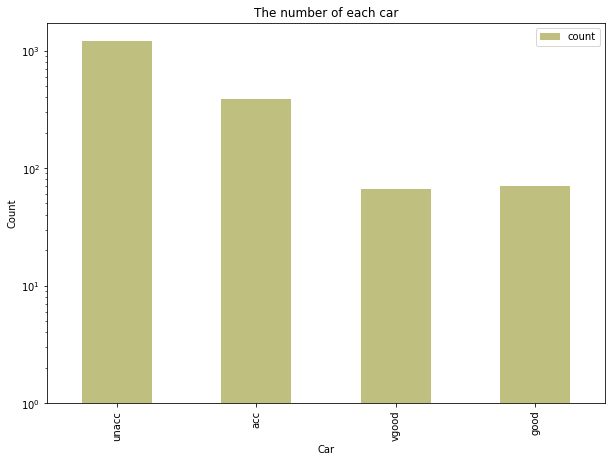

In [54]:
pd = df1.toPandas()
pl = pd.plot(kind="bar", 
              x="class", y="count", 
              figsize=(10, 7), log=True, alpha=0.5, color="olive")

pl.set_xlabel("Car")
pl.set_ylabel("Count")
pl.set_title("The number of each car")

Running SQL Queries Programmatically

In [55]:
df.createOrReplaceTempView("car")

sqlDF = spark.sql("SELECT * FROM car")
sqlDF.show()

+------+-----+-----+-------+--------+------+-----+
|buying|maint|doors|persons|lug_boot|safety|class|
+------+-----+-----+-------+--------+------+-----+
| vhigh|vhigh|    2|      2|   small|   low|unacc|
| vhigh|vhigh|    2|      2|   small|   med|unacc|
| vhigh|vhigh|    2|      2|   small|  high|unacc|
| vhigh|vhigh|    2|      2|     med|   low|unacc|
| vhigh|vhigh|    2|      2|     med|   med|unacc|
| vhigh|vhigh|    2|      2|     med|  high|unacc|
| vhigh|vhigh|    2|      2|     big|   low|unacc|
| vhigh|vhigh|    2|      2|     big|   med|unacc|
| vhigh|vhigh|    2|      2|     big|  high|unacc|
| vhigh|vhigh|    2|      4|   small|   low|unacc|
| vhigh|vhigh|    2|      4|   small|   med|unacc|
| vhigh|vhigh|    2|      4|   small|  high|unacc|
| vhigh|vhigh|    2|      4|     med|   low|unacc|
| vhigh|vhigh|    2|      4|     med|   med|unacc|
| vhigh|vhigh|    2|      4|     med|  high|unacc|
| vhigh|vhigh|    2|      4|     big|   low|unacc|
| vhigh|vhigh|    2|      4|   

In [57]:
sqlDF = spark.sql("SELECT * FROM car WHERE doors > 2")
sqlDF.show()

+------+-----+-----+-------+--------+------+-----+
|buying|maint|doors|persons|lug_boot|safety|class|
+------+-----+-----+-------+--------+------+-----+
| vhigh|vhigh|    3|      2|   small|   low|unacc|
| vhigh|vhigh|    3|      2|   small|   med|unacc|
| vhigh|vhigh|    3|      2|   small|  high|unacc|
| vhigh|vhigh|    3|      2|     med|   low|unacc|
| vhigh|vhigh|    3|      2|     med|   med|unacc|
| vhigh|vhigh|    3|      2|     med|  high|unacc|
| vhigh|vhigh|    3|      2|     big|   low|unacc|
| vhigh|vhigh|    3|      2|     big|   med|unacc|
| vhigh|vhigh|    3|      2|     big|  high|unacc|
| vhigh|vhigh|    3|      4|   small|   low|unacc|
| vhigh|vhigh|    3|      4|   small|   med|unacc|
| vhigh|vhigh|    3|      4|   small|  high|unacc|
| vhigh|vhigh|    3|      4|     med|   low|unacc|
| vhigh|vhigh|    3|      4|     med|   med|unacc|
| vhigh|vhigh|    3|      4|     med|  high|unacc|
| vhigh|vhigh|    3|      4|     big|   low|unacc|
| vhigh|vhigh|    3|      4|   